In [7]:
!pip install matplotlib
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Notebook for generating graphics

## Timeline of Events:

/var/folders/r6/6h8mtjj914j_0j9_yn_4cm1m0000gn/T/ipykernel_47824/510592175.py:57: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((1.05, 0.9), 0.1, 0.06 * len(colors), fill=True, color='white', edgecolor='black', lw=2))


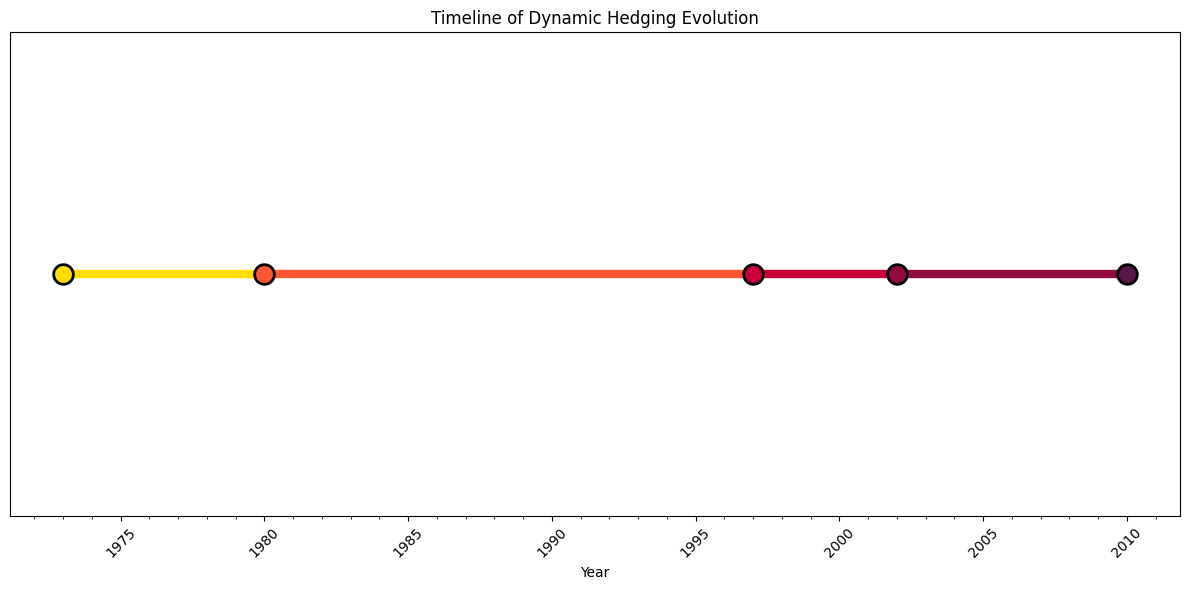

/var/folders/r6/6h8mtjj914j_0j9_yn_4cm1m0000gn/T/ipykernel_47824/510592175.py:122: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


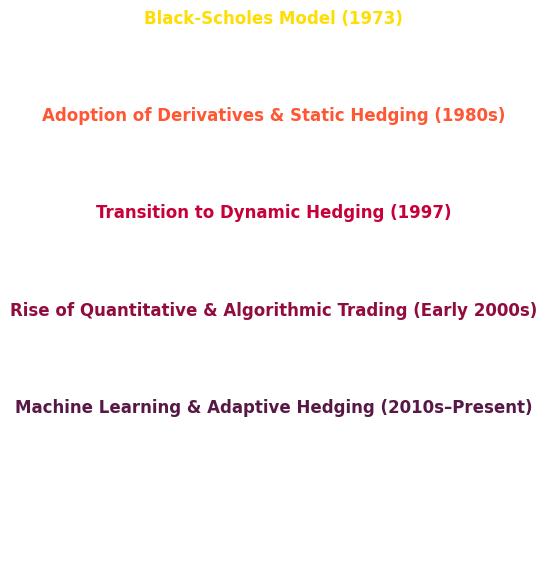

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Recreating the timeline DataFrame
timeline_data = {
    'Event': [
        "Black-Scholes Model (1973)",
        "Adoption of Derivatives & Static Hedging (1980s)",
        "Transition to Dynamic Hedging (1997)",
        "Rise of Quantitative & Algorithmic Trading (Early 2000s)",
        "Machine Learning & Adaptive Hedging (2010s–Present)"
    ],
    'Date': [
        pd.to_datetime("1973-01-01"),
        pd.to_datetime("1980-01-01"),
        pd.to_datetime("1997-01-01"),
        pd.to_datetime("2002-01-01"),
        pd.to_datetime("2010-01-01")
    ]
}

# Convert data into DataFrame
timeline_df = pd.DataFrame(timeline_data)

# Creating the timeline chart with no labels, only the markers and lines
fig, ax = plt.subplots(figsize=(12, 6))

# Adding the colored markers on the timeline
colors = ['#FFDD00', '#FF5733', '#C70039', '#900C3F', '#581845']

# Adding the markers for events on the timeline
for i, row in timeline_df.iterrows():
    ax.scatter([row['Date']], [1], color=colors[i], s=200, zorder=5, edgecolors="black", linewidth=2)

# Add colored lines connecting the points along the timeline
for i in range(len(timeline_df) - 1):
    ax.plot([timeline_df['Date'][i], timeline_df['Date'][i + 1]], 
            [1, 1], color=colors[i], lw=6, solid_capstyle='round')

# Formatting the plot
ax.set_yticks([])
ax.set_xlabel('Year')
ax.set_title('Timeline of Dynamic Hedging Evolution')

# Formatting x-axis to display years properly
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation=45)

# Create a box around the legend/key outside the chart area
# Adjusting position of key and ensuring no overlap with the main plot
plt.subplots_adjust(right=0.75)

# Create a rectangular box for the legend
ax.add_patch(plt.Rectangle((1.05, 0.9), 0.1, 0.06 * len(colors), fill=True, color='white', edgecolor='black', lw=2))

# Show the plot without labels
plt.tight_layout()
plt.show()


# Legend (had to make these seperately)
# Recreating the timeline DataFrame and fixing the issue
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Defining the timeline data
timeline_data = {
    'Event': [
        "Black-Scholes Model (1973)",
        "Adoption of Derivatives & Static Hedging (1980s)",
        "Transition to Dynamic Hedging (1997)",
        "Rise of Quantitative & Algorithmic Trading (Early 2000s)",
        "Machine Learning & Adaptive Hedging (2010s–Present)"
    ],
    'Date': [
        pd.to_datetime("1973-01-01"),
        pd.to_datetime("1980-01-01"),
        pd.to_datetime("1997-01-01"),
        pd.to_datetime("2002-01-01"),
        pd.to_datetime("2010-01-01")
    ]
}

# Convert data into DataFrame
timeline_df = pd.DataFrame(timeline_data)

# Now let's recreate the chart with the stacked labels and improved layout
fig2, ax2 = plt.subplots(figsize=(2, 6))

# Colors for the stacked labels
colors = ['#FFDD00', '#FF5733', '#C70039', '#900C3F', '#581845']
event_labels = [
    "Black-Scholes Model (1973)",
    "Adoption of Derivatives & Static Hedging (1980s)",
    "Transition to Dynamic Hedging (1997)",
    "Rise of Quantitative & Algorithmic Trading (Early 2000s)",
    "Machine Learning & Adaptive Hedging (2010s–Present)"
]

# Stacking the event labels vertically on the side with corresponding colors
for i, label in enumerate(event_labels):
    ax2.text(0.5, 1 - i * 0.18, label, horizontalalignment='center', fontsize=12, fontweight='bold', color=colors[i])

# Remove ticks and labels from y-axis and x-axis
ax2.set_yticks([])
ax2.set_xticks([])

# Remove the plot frame and any surrounding lines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Adjust layout for better spacing
plt.subplots_adjust(left=0.2, right=0.8, top=0.95, bottom=0.05)

# Show the stacked labels without title, box, or lines
plt.tight_layout()
plt.show()


## Bubble Chart

In [ ]:
# Bubble chart for 